# Packages

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Dataset

In [47]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [48]:
!pip install kaggle

In [49]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [50]:
!kaggle datasets download -d karanchinchpure/house-price-predict-in-mumbai-city

house-price-predict-in-mumbai-city.zip: Skipping, found more recently modified local copy (use --force to force download)


In [51]:
!unzip house-price-predict-in-mumbai-city.zip

Archive:  house-price-predict-in-mumbai-city.zip
replace house_price_mumbai.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: house_price_mumbai.csv  


# Standardising Data

In [170]:
filename = '/content/house_price_mumbai.csv'
data = pd.read_csv(filename)

In [171]:
print(f" \t House attributes = {data.columns.values}, \n \t No. of house records = {data.shape[0]}, \n \t Shape of Data = {data.shape}")

 	 House attributes = ['BHK' 'project' 'Location' 'City' 'Total sqft' 'price_sqft' 'price'], 
 	 No. of house records = 3980, 
 	 Shape of Data = (3980, 7)


### Dropping redundunt columns (project, Location, City)

In [172]:
drop_attributes = ['project', 'Location', 'City']
data.drop(drop_attributes, axis = 1, inplace = True)

### Converting price to Integer values

In [173]:
def updatePrice(price):
  price_sep = price.split(' ')
  denomination = price_sep[1]
  price_value = float(price_sep[0])

  if (denomination == 'Cr'):
    price_value = price_value * 1_00_00_000
  elif (denomination == 'L'):
    price_value = price_value * 1_00_000

  return price_value

In [174]:
attribute_name = 'price'
data[attribute_name] = data[attribute_name].apply(lambda value : updatePrice(value))

### Converting priceSqft to integer values

In [175]:
def updatePriceSqft(priceSqft):
  return int(priceSqft.replace(',', ''))

In [176]:
attribute_name = 'price_sqft'
data[attribute_name] = data[attribute_name].apply(lambda value : updatePriceSqft(value))

### Converting BHK to numbers

In [177]:
def updateBHKInfo(bhk):
  if (bhk.split(' ')[0] == 'R'):
    return 1
  return int(bhk.split(' ')[0])

In [178]:
attribute_name = 'BHK'
data[attribute_name] = data[attribute_name].apply(lambda value : updateBHKInfo(value))

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3980 entries, 0 to 3979
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BHK         3980 non-null   int64  
 1   Total sqft  3980 non-null   int64  
 2   price_sqft  3980 non-null   int64  
 3   price       3980 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 124.5 KB


# Visual Representation for 2, 3, 4 BHK Houses

In [186]:
attribute_name, x_axis, y_axis = 'BHK', 'Total sqft', 'price'

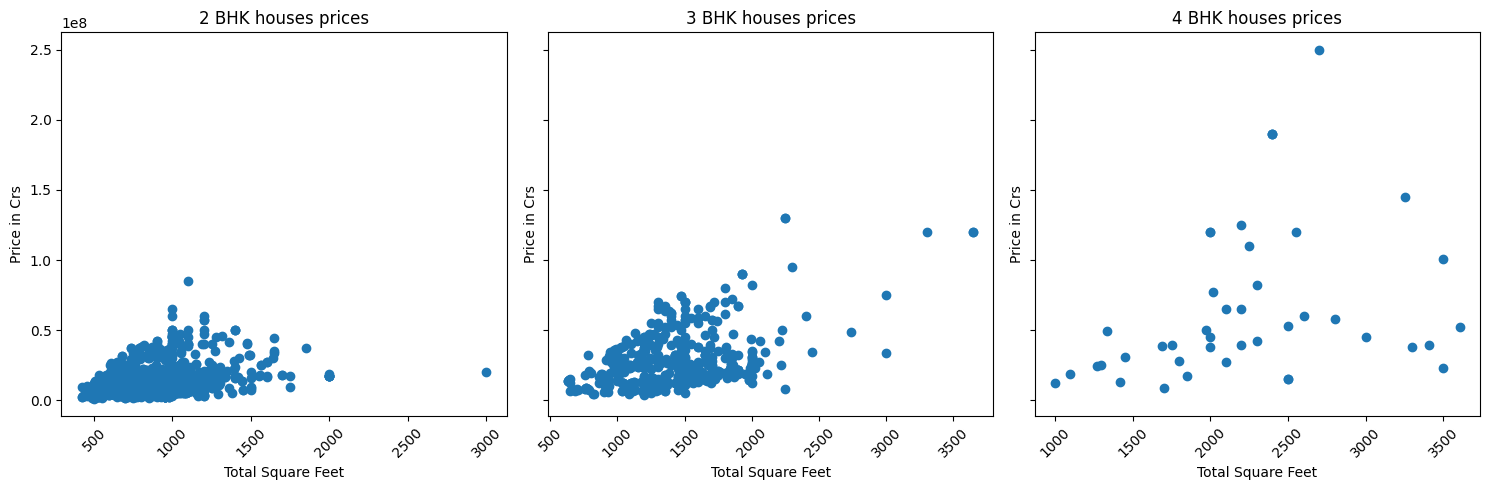

In [210]:
attribute_name, x_axis, y_axis = 'BHK', 'Total sqft', 'price'

bhk_uniques = data[attribute_name].unique()
bhk_uniques.sort()
bhk_uniques = bhk_uniques[1:4]

fig, axes = plt.subplots(nrows=1, ncols=len(bhk_uniques), figsize=(15, 5), sharey=True)

for i, u_bhk in enumerate(bhk_uniques):
    indexes = data[data[attribute_name] == u_bhk].index
    axes[i].scatter(data[data.index.isin(indexes)][x_axis], data[data.index.isin(indexes)][y_axis])
    axes[i].set_title(f"{u_bhk} BHK houses prices")
    axes[i].set_xlabel("Total Square Feet")
    axes[i].set_ylabel("Price in Crs")

    axes[i].tick_params(axis = 'x', rotation = 45)

plt.tight_layout()
plt.show()

# Train Test split data

In [222]:
x_attributes, y_attributes = ['BHK', 'Total sqft', 'price_sqft'], ['price']
x_train, y_train, x_test, y_test = train_test_split(data[x_attributes], data[y_attributes], test_size = 0.03, random_state = 1234)

print(f"Data stats: \n Training data size [ x = {x_train.shape}, y = {y_train.shape} ] \n Testing data size [ x = {x_test.shape}, y  = {y_test.shape} ] \n")

Data stats: 
 Training data size [ x = (3860, 3), y = (120, 3) ] 
 Testing data size [ x = (3860, 1), y  = (120, 1) ] 



# Simple Linear Regression
<p>  $$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$ </p>